<h1 align="center">Volume 4: Inverse Problems.</h1>

    NAME Daniel Smith 
    Section # 2
    DATE 27 January 2022

In [10]:
import numpy as np
from scipy.optimize import minimize as m
from scipy.integrate import quad
from matplotlib import pyplot as plt

# Problem 1

Solve (16.2) for a(x).
Produce the plot shown in Figure 16.2.

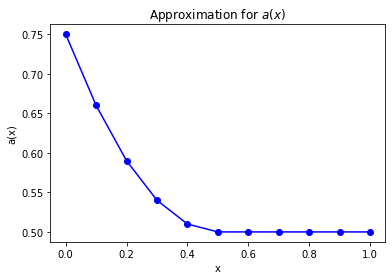

In [23]:
c0, c1 = 3/8, 5/4 # Initialize c0, c1, the derivative of u, x values, f, and list for tracking coefficients 
up = lambda x: 2*x + 1/2
xs = [.1*j for j in range(11)]
f = lambda x: -1 if (x <= 1 and x > 1/2) else -6*x**2 + 3*x - 1
ajs = []

for xj in xs: # Loop through the x values 
    func = lambda aj: ((c0 - quad(f, 0, xj)[0])/aj - up(xj))**2 # Initialize function to minimize 
    ajs.append(m(func, 1).x[0]) # Get the coefficient 

# Generate plot 
plt.plot(xs, ajs, "-o", color = "blue")
plt.xlabel("x")
plt.ylabel("a(x)")
plt.title(r"Approximation for $a(x)$")
plt.show()

# Problem 2

Find the density function a(x). Using several values of ε > 0.66049142, plot the corresponding
density a(x) for x in np.linspace(0,1,11) to demonstrate that the problem is ill-posed.

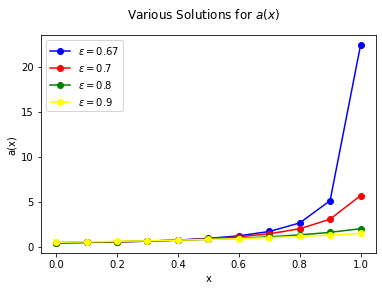

In [39]:
f = lambda x: -1 # Initialize f, c0, list for epsilons, domain, and list for tracking coefficients 
c0 = 1
epsilons = [.67, .7, .8, .9]
colors = ["blue", "red", "green", "yellow"]
domain = np.linspace(0, 1, 11)
ajs = []

for ee, col in zip(epsilons, colors): # Loop through different values of epsilon 
    for xj in xs: # Loop through the x values 
        up = lambda x: 1 + ee**(-1)*np.cos(ee**(-2)*x) # Initialize the derivative of u with epsilon 
        func = lambda aj: ((c0 - quad(f, 0, xj)[0])/aj - up(xj))**2 # Function to minimize 
        ajs.append(m(func, 1).x[0]) # Get the coefficient 
    
    plt.plot(domain, ajs, "-o", color = col, label = fr"$\epsilon ={ee}$") # Plot for specific epsilon 
    ajs = [] # Reset list for tracking coefficients 
    
plt.suptitle(r"Various Solutions for $a(x)$")
plt.xlabel("x")
plt.ylabel("a(x)")
plt.legend()
plt.show()